# Advanced Analytics in Fundraising - Predictive and Descriptive Analytics 
**Group 5:** Fernando Delgado, Mario Serrano and Harikrishnan Gopalakrishnan

## Feature Selection and Models
**Workflow stages:**

The following notebook goes through the following stages: 

1. Data Scaling and Partition
2. Feature Selection
3. Model construction
4. Model evaluation
5. Business Case - How much would our model have improved the performance of campagins?
6. Model Prediction with new campagin

In [69]:
# Data Analytics
import numpy                   as np
import pandas                  as pd
import statistics              as st
import statistics              as st
from datetime                  import datetime, timedelta

#Visualization
import matplotlib.pyplot       as plt
import plotly.graph_objects    as go

#Machine Learning
import sys
from sklearn.linear_model      import LogisticRegression
from sklearn.tree              import DecisionTreeClassifier
from sklearn.ensemble          import RandomForestClassifier
from sklearn.ensemble          import GradientBoostingClassifier
from sklearn.svm               import SVC
from sklearn.neural_network    import MLPClassifier
from sklearn.neighbors         import KNeighborsClassifier
from sklearn.metrics           import accuracy_score
from sklearn.metrics           import auc
from sklearn.metrics           import roc_auc_score
from scipy.stats               import pearsonr

from sklearn.model_selection   import train_test_split


In [70]:
#Read Datasets
df_train = pd.read_csv('../data/interim/Train Set Donors.csv')
df_test = pd.read_csv('../data/interim/Test Set Donors.csv')

In [71]:
df_train.columns

Index(['donorID', 'province', 'region', 'gender', 'language', 'Flanders',
       'Wallonia', 'Antwerp', 'Brussels', 'East Flanders', 'Flemish Brabant',
       'Hainaut', 'Liege', 'Limburg', 'Luxembourg', 'Namur', 'Walloon Brabant',
       'West Flanders', 'number_don', 'uni_campaigns', 'sum_amount',
       'min_amount', 'max_amount', 'avg_don', 'ratio_don', 'donated_more_one',
       'donated_more_five', 'more_30', 'target_6169', 'sup_95', 'rec_d',
       'rec_m', 'F', 'M', 'RFM_Score', 'RFM_Level', 'don_last_six_mon',
       'don_last_year', 'don_last_2_year', 'don_last_3_years', 'age',
       'age_group'],
      dtype='object')

## Data Scaling and Partition



In [4]:
#scale the data https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#scaled_base_table = pd.DataFrame(scaler.fit_transform(df_train.drop(['donorID'],axis=1)), columns=df_train.drop(['donorID'],axis=1).columns)

#scaled_base_table.head()


We tried to scale the data set to train our models but the result was not significant so we opted not to scale. 

We now proceed with the spliting of the data.

In [72]:
#Define features and target
features = list(df_train.drop(["target_6169"],1).columns)
target = 'target_6169'

# split data in train and test
X, y = df_train[features], df_train[target]
trainingSet, testSet, y_train, y_test = train_test_split(X,y, test_size=0.3,stratify = y, random_state=50)

trainingSet.head()

,donorID,province,region,gender,language,Flanders,Wallonia,Antwerp,Brussels,East Flanders,...,F,M,RFM_Score,RFM_Level,don_last_six_mon,don_last_year,don_last_2_year,don_last_3_years,age,age_group
25315,130488,East Flanders,Flanders,1,1,1,0,0,0,1,...,0.0,0.0,3.0,3,0.0,0.0,0.0,0.0,45,4
18709,122411,East Flanders,Flanders,0,1,1,0,0,0,1,...,0.0,0.0,2.0,3,0.0,0.0,0.0,0.0,49,4
30062,136514,Hainaut,Wallonia,0,0,0,1,0,0,0,...,0.0,0.0,3.0,3,0.0,0.0,0.0,0.0,53,5
21711,126098,Hainaut,Wallonia,1,0,0,1,0,0,0,...,0.0,0.0,4.0,3,0.0,0.0,0.0,1.0,29,2
31187,138106,Flemish Brabant,Flanders,0,1,1,0,0,0,0,...,0.0,0.0,4.0,3,0.0,0.0,0.0,0.0,67,6


In [73]:
#pip install -U imbalanced-learn
#we are going to try with oversampling

#from imblearn.over_sampling import RandomOverSampler

#ros = RandomOverSampler(random_state=0)
#X_resampled, y_resampled = ros.fit_resample(trainingSet, y_train)


We tried to use a random over sampler on the split to get better results, but the results did not got better so we did not use it. 

In [75]:
print(trainingSet.shape)

print(y_train.shape)


(24314, 41)
(24314,)


In [76]:
testSet.shape

(10421, 41)

## Feature Selection 
Using an Univariate feature selection we decide the best features to avoid overfitting. In this case, we use a p-value of 0.1 to choose the top features:

In [77]:
selectedFeatures = []

for column in trainingSet[features].columns:
    if column not in (['province','region']): #we dont take this two into consideration for the model analysis.
        (pearson,pvalue) = pearsonr(trainingSet[column],y_train)
        print(f"{column} - p-value = {pvalue} - selected : {1 if pvalue < 0.1 else 0}")
        if pvalue < 0.1:
            selectedFeatures.append(column)

donorID - p-value = 0.9557537840337423 - selected : 0
gender - p-value = 7.216531772714118e-64 - selected : 1
language - p-value = 0.0006798404846400292 - selected : 1
Flanders - p-value = 0.0003122393371574541 - selected : 1
Wallonia - p-value = 0.016336131694349762 - selected : 1
Antwerp - p-value = 0.5165187806875696 - selected : 0
Brussels - p-value = 0.007384422318335215 - selected : 1
East Flanders - p-value = 0.31915184153306086 - selected : 0
Flemish Brabant - p-value = 0.3966772137268193 - selected : 0
Hainaut - p-value = 0.017530678109310898 - selected : 1
Liege - p-value = 0.5457606212979496 - selected : 0
Limburg - p-value = 0.6371897449646712 - selected : 0
Luxembourg - p-value = 0.8597119027220226 - selected : 0
Namur - p-value = 0.6532887176285874 - selected : 0
Walloon Brabant - p-value = 0.04700979060955757 - selected : 1
West Flanders - p-value = 0.710775127477244 - selected : 0
number_don - p-value = 0.38942175049241956 - selected : 0
uni_campaigns - p-value = 0.1191

We obtained 17 variables as the most important ones for the model using the univariate selection:

In [79]:
print(len(selectedFeatures))
selectedFeatures

17


['gender',
 'language',
 'Flanders',
 'Wallonia',
 'Brussels',
 'Hainaut',
 'Walloon Brabant',
 'donated_more_one',
 'donated_more_five',
 'more_30',
 'sup_95',
 'rec_d',
 'rec_m',
 'RFM_Score',
 'RFM_Level',
 'age',
 'age_group']

## Model Construction

Now we are ready to train a model and predict the required solution. We want to identify relationship between output (Donated or not) with other variables or features. First we will run the AUC score of the following models to choose the best models to construct:
- Decision Tree
- Logistic Regression
- Random Forrest
- Boosted Tree
- Support Vector Machines
- Neural Network
- KNN or k-Nearest Neighbors

In [81]:
tree         = DecisionTreeClassifier()
logistic     = LogisticRegression(solver = "lbfgs", max_iter = 500)
randomForest = RandomForestClassifier(n_estimators = 100)
boostedTree  = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=10)
svm          = SVC(gamma = "scale", probability = True)
neuralNet    = MLPClassifier(random_state=10)
neighbors    = KNeighborsClassifier()
models = {"tree"         :tree,
          "logistic"     :logistic,
          "randomForest" :randomForest,
          "boostedTree"  :boostedTree,
          "svm"          :svm,
          "neuralNet"    :neuralNet,
          "neighbors"    :neighbors
         }
performances = {}


In [82]:
for model in models:
    models[model].fit(trainingSet[selectedFeatures],y_train)


In [83]:
for model in models:
    predictions   = models[model].predict(testSet[selectedFeatures])
    probabilities = pd.DataFrame(models[model].predict_proba(testSet[selectedFeatures]))[1]
    accuracy      = accuracy_score(y_test,predictions)
    auc           = roc_auc_score(np.array(y_test),np.array(probabilities))
    performances[model] = {"Accuracy":accuracy,"AUC":auc}


C:\tools\Anaconda3\envs\py\lib\site-packages\sklearn\base.py:441: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names

C:\tools\Anaconda3\envs\py\lib\site-packages\sklearn\base.py:441: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names



In [84]:
pd.DataFrame(performances)

,tree,logistic,randomForest,boostedTree,svm,neuralNet,neighbors
Accuracy,0.945015,0.972747,0.969964,0.972747,0.972747,0.957202,0.972651
AUC,0.516132,0.745871,0.645001,0.744513,0.572535,0.736055,0.518586


## Model Evaluation

From the tested models, the three with the highest AUC were selected: Logistic, Boosted Tree or Gradient Classifier and Neural Network

#### Gradient Classifier

In [85]:
# Gradient Classifier
boostedTree  = GradientBoostingClassifier(n_estimators=100, learning_rate= 1, max_depth=1, random_state=0)
boostedTree = boostedTree.fit(trainingSet[selectedFeatures].values, y_train)

# predict probabilities
pred_train = boostedTree.predict_proba(trainingSet[selectedFeatures].values)
pred_test = boostedTree.predict_proba(testSet[selectedFeatures].values)

# evaluate predictions
acc_train = accuracy_score(y_train, np.argmax(pred_train, axis=1))
acc_test = accuracy_score(y_test, np.argmax(pred_test, axis=1))
aucTraining = roc_auc_score(y_train,pred_train[:,1])
aucTest = roc_auc_score(y_test,pred_test[:,1])

print(f"Accuracy Train:\tACC={acc_train:.4f}")
print(f"Accuracy Test:\tACC={acc_test:.4f}")
print(f"AUC Train:\tACC={aucTraining:.4f}")
print(f"AUC Test:\tACC={aucTest:.4f}")

Accuracy Train:	ACC=0.9729
Accuracy Test:	ACC=0.9727
AUC Train:	ACC=0.7829
AUC Test:	ACC=0.7445


#### Logistic Regresion

In [88]:
##Logistic Regression
logreg = LogisticRegression(solver = "lbfgs", max_iter = 500)
logreg = logreg.fit(trainingSet[selectedFeatures].values, y_train)

#predict probabilities
pred_train = logreg.predict_proba(trainingSet[selectedFeatures].values)
pred_test = logreg.predict_proba(testSet[selectedFeatures].values)

# evaluate predictions
acc_train = accuracy_score(y_train, np.argmax(pred_train, axis=1))
acc_test = accuracy_score(y_test, np.argmax(pred_test, axis=1))
aucTraining = roc_auc_score(y_train,pred_train[:,1])
aucTest = roc_auc_score(y_test,pred_test[:,1])

print(f"Accuracy Train:\tACC={acc_train:.4f}")
print(f"Accuracy Test:\tACC={acc_test:.4f}")
print(f"AUC Train:\tACC={aucTraining:.4f}")
print(f"AUC Test:\tACC={aucTest:.4f}")

Accuracy Train:	ACC=0.9728
Accuracy Test:	ACC=0.9727
AUC Train:	ACC=0.7481
AUC Test:	ACC=0.7459


#### MLP Classifier

In [95]:
##MLP Classifier
mlp = MLPClassifier(solver = "adam", max_iter = 500, batch_size=25,hidden_layer_sizes=(32,16),early_stopping=False)
mlp = mlp.fit(trainingSet[selectedFeatures].values, y_train)

#predict probabilities
pred_train = mlp.predict_proba(trainingSet[selectedFeatures].values)
pred_test = mlp.predict_proba(testSet[selectedFeatures].values)

# evaluate predictions
acc_train = accuracy_score(y_train, np.argmax(pred_train, axis=1))
acc_test = accuracy_score(y_test, np.argmax(pred_test, axis=1))
aucTraining = roc_auc_score(y_train,pred_train[:,1])
aucTest = roc_auc_score(y_test,pred_test[:,1])

print(f"Accuracy Train:\tACC={acc_train:.4f}")
print(f"Accuracy Test:\tACC={acc_test:.4f}")
print(f"AUC Train:\tACC={aucTraining:.4f}")
print(f"AUC Test:\tACC={aucTest:.4f}")

Accuracy Train:	ACC=0.9729
Accuracy Test:	ACC=0.9727
AUC Train:	ACC=0.7087
AUC Test:	ACC=0.7009


##### ROC curve -Gradient Boosting Classifier
 
reference https://towardsdatascience.com/roc-and-auc-how-to-evaluate-machine-learning-models-in-no-time-fb2304c83a7f 


AUC Score for GradientBoostingClassifier(learning_rate=1, max_depth=1, random_state=0) 0.74


C:\tools\Anaconda3\envs\py\lib\site-packages\sklearn\base.py:434: UserWarning:

X has feature names, but GradientBoostingClassifier was fitted without feature names



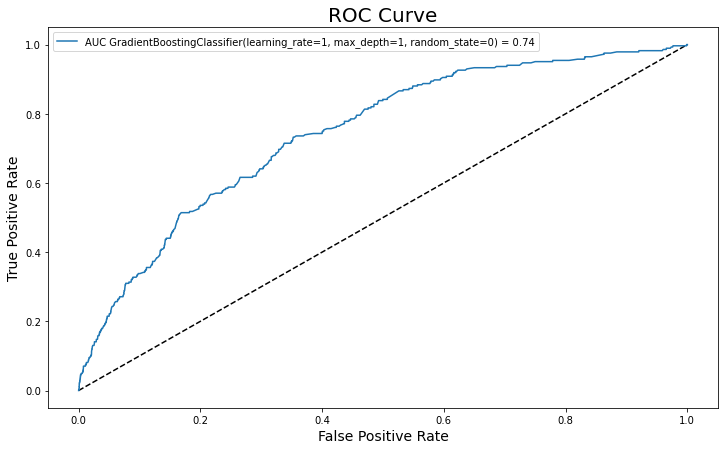

In [97]:
from sklearn.metrics        import roc_auc_score, roc_curve

plt.figure(figsize=(12, 7))
x = boostedTree.predict_proba(testSet[selectedFeatures])[:, 1]
y = roc_auc_score(y_test, x)
fpr, tpr, thresholds = roc_curve(y_test, x)
print('AUC Score for', boostedTree, round(y,2))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label=f'AUC {boostedTree} = {y:.2f}')
plt.title('ROC Curve', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend()


##### ROC curve -Gradient Boosting Classifier (Non-linear model) vs Logistic Regression (Linear Model)

AUC Score for Logistic Regression 0.75
AUC Score for Gradient Boosting 0.74


C:\tools\Anaconda3\envs\py\lib\site-packages\sklearn\base.py:434: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

C:\tools\Anaconda3\envs\py\lib\site-packages\sklearn\base.py:434: UserWarning:

X has feature names, but GradientBoostingClassifier was fitted without feature names



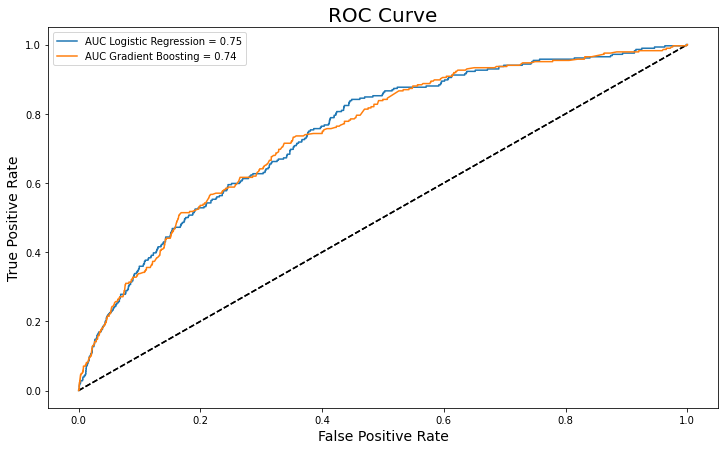

In [98]:
plt.figure(figsize=(12, 7))
models = {"Logistic Regression" : logreg,
         "Gradient Boosting" : boostedTree 
         }
for model in models :
    x = models[model].predict_proba(testSet[selectedFeatures])[:, 1]
    y = roc_auc_score(y_test, x)
    fpr, tpr, thresholds = roc_curve(y_test, x)
    print('AUC Score for', model, round(y,2))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label=f'AUC {model} = {y:.2f}')
    plt.title('ROC Curve', size=20)
    plt.xlabel('False Positive Rate', size=14)
    plt.ylabel('True Positive Rate', size=14)
    plt.legend()


## Test Model on Second Campaign

Now we test our selected model (Boosted Tree) with our test data (campaign 7244)

In [99]:
# test on data

target =df_test['target_7244']

# predict probabilities
pred_test = boostedTree.predict_proba(df_test[selectedFeatures].values)
aucTest = roc_auc_score(target,pred_test[:,1])
print(f"AUC={aucTest:.4f}")

AUC=0.6549


We obtained a AUC of 0.6549 on the test information for the campaign 7244

## Business Case
How much would our model have improved the performance of campagins? and how much they could have gained?

We add our calculated probability of donation to our database

In [103]:
df_test['proba_donation']= pred_test[:,1]
df_test.head()

,donorID,province,region,gender,language,Flanders,Wallonia,Antwerp,Brussels,East Flanders,...,M,RFM_Score,RFM_Level,don_last_six_mon,don_last_year,don_last_2_year,don_last_3_years,age,age_group,proba_donation
0,100001,Flemish Brabant,Flanders,0,1,1,0,0,0,0,...,0.0,2.0,3,0.0,0.0,0.0,0.0,51,5,0.023603
1,100002,Antwerp,Flanders,1,1,1,0,1,0,0,...,0.0,3.0,3,0.0,0.0,0.0,0.0,66,6,0.018972
2,100008,Flemish Brabant,Flanders,1,0,1,0,0,0,0,...,0.0,2.0,3,0.0,0.0,0.0,0.0,81,8,0.041520
3,100009,Brussels,Brussels,1,0,0,0,0,1,0,...,0.0,2.0,3,0.0,0.0,0.0,0.0,86,8,0.009019
4,100010,Brussels,Brussels,1,0,0,0,0,1,0,...,0.0,3.0,3,0.0,0.0,0.0,0.0,35,3,0.003407


In [104]:
#sort the data by probability of donation in descending order
df_test = df_test.sort_values('proba_donation', ascending = False)
df_test.head()

,donorID,province,region,gender,language,Flanders,Wallonia,Antwerp,Brussels,East Flanders,...,M,RFM_Score,RFM_Level,don_last_six_mon,don_last_year,don_last_2_year,don_last_3_years,age,age_group,proba_donation
2473,105428,West Flanders,Flanders,0,1,1,0,0,0,0,...,0.0,5.0,2,1.0,1.0,1.0,1.0,50,5,0.745274
8850,118987,West Flanders,Flanders,0,1,1,0,0,0,0,...,0.0,4.0,3,1.0,1.0,1.0,1.0,96,9,0.568353
16243,129733,Flemish Brabant,Flanders,0,1,1,0,0,0,0,...,0.0,4.0,3,1.0,1.0,1.0,1.0,76,7,0.540233
3112,106873,East Flanders,Flanders,0,1,1,0,0,0,1,...,0.0,3.0,3,0.0,0.0,0.0,1.0,81,8,0.537982
1889,104141,Flemish Brabant,Flanders,0,1,1,0,0,0,0,...,0.0,4.0,3,0.0,0.0,0.0,1.0,65,6,0.496351


By subseting everything into 10 groups (deciles), we can estimate the number of people that would have donated with our model

In [105]:
#generate deciles

df_test['Decile_rank'] = pd.qcut(df_test['proba_donation'], 10,labels = False)
df_test['Decile_rank'].value_counts()

2    2644
0    2606
3    2602
8    2596
5    2575
6    2561
7    2555
9    2533
1    2523
4    2447
Name: Decile_rank, dtype: int64

In [106]:
#create business case table

#group by deciles
table = pd.DataFrame(df_test.groupby('Decile_rank')['target_7244'].agg(['sum','count']))
table = table.sort_values('Decile_rank',ascending=False)

#get cumulative sums of total people and donors
table['cumsum']=np.cumsum(table['sum'])
table['cumcount']=np.cumsum(table['count'])

#calculate response rate
table['response_rate'] = table['cumsum']/table['cumcount'] 

#calculate lift
table['lift'] = table['response_rate']/table['response_rate'].min() 

table

,sum,count,cumsum,cumcount,response_rate,lift
Decile_rank,,,,,,
9,48,2533,48,2533,0.018950,2.239227
8,33,2596,81,5129,0.015793,1.866141
7,27,2555,108,7684,0.014055,1.660843
6,34,2561,142,10245,0.013860,1.637829
5,18,2575,160,12820,0.012480,1.474769
4,11,2447,171,15267,0.011201,1.323532
3,14,2602,185,17869,0.010353,1.223386
2,16,2644,201,20513,0.009799,1.157868
1,7,2523,208,23036,0.009029,1.066961


In [107]:
#export to csv for a deeper analysis in excel
table.to_csv(r'../data/interim/business_case.csv')

**Following, we calculate our lift, cumulative gains and donation probability in the annexed excel file**

# Profiling
Based on our predicted probability, we can profile our donors to identify what is our ideal donor as well as our non-ideal donor. To do this, we follow a Pareto Principle (asuming that the top 20% are going to generate the 80% of the income).

- **Ideal Donor:** Donors that are in the **top 20% most probable to donate** 

- **Non-ideal Donor:** Donors that are in the **worst 20% of probable donors**. 


In [108]:
#Ideal donators (top 20%)
df_test['top_20'] = 0
df_test.loc[df_test['Decile_rank'].isin([9,8]),'top_20'] = 1
print(df_test['top_20'].sum()/df_test.shape[0])

0.20002339911083378


In [109]:
#Non-Ideal donators (worst 20%)
df_test['worst_20'] = 0
df_test.loc[df_test['Decile_rank'].isin([1,0]),'worst_20'] = 1
print(df_test['worst_20'].sum()/df_test.shape[0])

0.20002339911083378


### Profiling by Age 
First, we take a look at our ages
- Our Ideal donor age mean: 62
- Non-Ideal donor age mean: 36

In [110]:
#Subset ages of top and worst group
top_ages = df_test.age[df_test['top_20']==1]
worst_ages = df_test.age[df_test['worst_20']==1]
print(top_ages.mean())
print(worst_ages.mean())

62.82745174497953
36.70403587443946


**Age distribution**

In [111]:
#Histogram Plot
x0 = top_ages
x1 = worst_ages

fig = go.Figure()

fig.add_trace(go.Histogram(x=x1, name = 'Non-Ideal Donors',marker_color='#EB89B5', opacity =1))
fig.add_trace(go.Histogram(x=x0, name = 'Ideal Donors', marker_color='#330C73', opacity = 0.85))

fig.update_layout(
    title_text='Donor Ages', # title of plot
    xaxis_title_text='Age', # xaxis label
    yaxis_title_text='Count', # yaxis label
    bargap=0.1, # gap between bars of adjacent location coordinates
    bargroupgap=0.1) # gap between bars of the same location coordinates

fig.show()

**Age group distribution**

In [112]:
#Subset ages of top and worst group
top_agegroup = df_test.age_group[df_test['top_20']==1]
worst_agegroup = df_test.age_group[df_test['worst_20']==1]
print(top_agegroup.mean())
print(worst_agegroup.mean())

5.832715929031
3.2234353675180345


In [113]:
#Histogram Plot
x0 = top_agegroup
x1 = worst_agegroup

fig = go.Figure()

fig.add_trace(go.Histogram(x=x1, name = 'Non-Ideal Donors',marker_color='#EB89B5', opacity =1))
fig.add_trace(go.Histogram(x=x0, name = 'Ideal Donors', marker_color='#330C73', opacity = 0.85))

fig.update_layout(
    title_text='Distribution by Age Group', # title of plot
    xaxis_title_text='Age', # xaxis label
    yaxis_title_text='Count', # yaxis label
    bargap=0.1, # gap between bars of adjacent location coordinates
    bargroupgap=0.1) # gap between bars of the same location coordinates

fig.show()

### Profiling by Gender

In [114]:
#Subset genders of top and worst group
top_gender = df_test.gender[df_test['top_20']==1]
worst_gender = df_test.gender[df_test['worst_20']==1]

top_males = round(top_gender.sum() / top_gender.count(),2)
top_females = round((top_gender.count() - top_gender.sum()) / top_gender.count(),2) 

worst_males = round(worst_gender.sum() / worst_gender.count(),2)
worst_females = round((worst_gender.count() - worst_gender.sum()) / worst_gender.count(),2)

In [115]:
#Plot Gender Distribution
gender=['Ideal Donors', 'Non-Ideal Donors']

fig = go.Figure(data=[
    go.Bar(name='Males', x=gender, y=(top_males, worst_males),marker_color='#330C73'),
    go.Bar(name='Females', x=gender, y=(top_females, worst_females), marker_color='#EB89B5')
])

fig.update_layout(yaxis_tickformat = '.0%')

# Change the bar mode
fig.update_layout(
    barmode='stack',
    title_text='Donor Gender Distribution', # title of plot
    xaxis_title_text='Gender', # xaxis label
                 )

fig.show()

### Profiling by Region

In [116]:
top_20 = df_test[df_test['top_20']==1]
worst_20 = df_test[df_test['worst_20']==1]

In [117]:
#Subset regions
regions = list(df_test.region.unique())

ideal_flanders = top_20.region[top_20['region']=='Flanders'].count()
ideal_wallonia = top_20.region[top_20['region']=='Wallonia'].count()
ideal_brussels = top_20.region[top_20['region']=='Brussels'].count()

worst_flanders = worst_20.region[worst_20['region']=='Flanders'].count()
worst_wallonia = worst_20.region[worst_20['region']=='Wallonia'].count()
worst_brussels = worst_20.region[worst_20['region']=='Brussels'].count()

In [118]:
#Plot Region Distribution
fig = go.Figure()
fig.add_trace(go.Bar(
    x=regions,
    y=(ideal_flanders,ideal_wallonia,ideal_brussels),
    name='Ideal Donors',
    marker_color='#EB89B5'
))
fig.add_trace(go.Bar(
    x=regions,
    y=(worst_flanders, worst_wallonia,worst_brussels),
    name='Non-Ideal Donors',
    marker_color='#330C73'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group')
fig.show()

### Profiling by Province 
Given that most of our ideal donors are in Flanders, we take a look at our Flanders Region:

In [119]:
Flanders = df_test[df_test['region']=='Flanders']
Wallonia = df_test[df_test['region']=='Wallonia']

In [120]:
#Data for plot

#province list
provinces_flanders = list(Flanders.province.unique())

#ideal population by province
ideal_wf = top_20.province[top_20['province']=='West Flanders'].count()
ideal_ef = top_20.province[top_20['province']=='East Flanders'].count()
ideal_fb = top_20.province[top_20['province']=='Flemish Brabant'].count()
ideal_a = top_20.province[top_20['province']=='Antwerp'].count()
ideal_l = top_20.province[top_20['province']=='Limburg'].count()

#worst population by province
worst_wf = worst_20.province[worst_20['province']=='West Flanders'].count()
worst_ef = worst_20.province[worst_20['province']=='East Flanders'].count()
worst_fb = worst_20.province[worst_20['province']=='Flemish Brabant'].count()
worst_a = worst_20.province[worst_20['province']=='Antwerp'].count() 
worst_l = worst_20.province[worst_20['province']=='Limburg'].count() 

In [121]:
#Plot Province Distribution
fig = go.Figure()

fig.add_trace(go.Bar(
    x=provinces_flanders,
    y=(ideal_wf,ideal_ef, ideal_fb, ideal_a, ideal_l),
    name='Ideal Donors',
    marker_color='#EB89B5'
))

fig.add_trace(go.Bar(
    x=provinces_flanders,
    y=(worst_wf, worst_ef, worst_fb, worst_a, worst_l),
    name='Non-Ideal Donors',
    marker_color='#330C73'
))



fig.update_layout(barmode='group',
                 title_text='Ideal Donors in Flanders'# title of plot
                 )
fig.show()

In [122]:
#Data for plot

#province list
provinces_wallonia = list(Wallonia.province.unique())

#ideal population by province
ideal_lux = top_20.province[top_20['province']=='Luxembourg'].count()
ideal_lie = top_20.province[top_20['province']=='Liege'].count()
ideal_h = top_20.province[top_20['province']=='Hainaut'].count()
ideal_na = top_20.province[top_20['province']=='Namur'].count()
ideal_wb = top_20.province[top_20['province']=='Walloon Brabant'].count()

#worst population by province
worst_lux = worst_20.province[worst_20['province']=='Luxembourg'].count()
worst_lie = worst_20.province[worst_20['province']=='Liege'].count()
worst_h = worst_20.province[worst_20['province']=='Hainaut'].count()
worst_na = worst_20.province[worst_20['province']=='Namur'].count() 
worst_wb = worst_20.province[worst_20['province']=='Walloon Brabant'].count() 

In [123]:
#Plot Province Distribution
fig = go.Figure()

fig.add_trace(go.Bar(
    x=provinces_wallonia,
    y=(ideal_lux, ideal_lie, ideal_h, ideal_na, ideal_wb),
    name='Ideal Donors',
    marker_color='#EB89B5'
))

fig.add_trace(go.Bar(
    x=provinces_wallonia,
    y=(worst_lux, worst_lie, worst_h, worst_na, worst_wb),
    name='Non-Ideal Donors',
    marker_color='#330C73'
))



fig.update_layout(barmode='group',
                 title_text='Ideal Donors in Wallonia'# title of plot
                 )
fig.show()

### Profiling by Preferred Language 

In [124]:
#Subset languages
languages = list(df_test.language.unique())

ideal_dutch = top_20.region[top_20['language']==1].count()
ideal_french = top_20.region[top_20['language']==0].count()

worst_dutch = worst_20.region[worst_20['language']==1].count()
worst_french = worst_20.region[worst_20['language']==0].count()

In [125]:
#Plot Region Distribution
fig = go.Figure()

fig.add_trace(go.Bar(
    x=languages,
    y=(ideal_dutch, ideal_french),
    name='Ideal Donors',
    marker_color='#EB89B5'
))

fig.add_trace(go.Bar(
    x=languages,
    y=(worst_dutch, worst_french),
    name='Non-Ideal Donors',
    marker_color='#330C73'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group')
fig.show()

##  Model Prediction with new campagin

Now, in this last step we generate the database according to the selected donors for the campaign 7362. We create the same features as for the train and test sets.

Once we have the data prepared, we run the selected model with the selected features and get a score by donorID.
#### Data Preparation

In [127]:
new_selected = pd.read_csv('../data/raw/new_campaign_selection.csv')
new_selected.head(2)

,donorID
0,134242
1,126503


In [129]:
#get preprocessed gifts and donor tables

gifts = pd.read_csv('../data/interim/gifts_preprocessed.csv')
donors = pd.read_csv('../data/interim/donors_preprocessed.csv')
gifts.head(2)

,donorID,campaignID,amount,date_x,date_y,days_after,campaignID_missing
0,100001,1.0,12.39,2004-03-23,2004-03-23,0.0,1
1,100001,1577.0,12.39,2007-10-11,2007-09-10,31.0,0


New information if for a campaign starting in february 1, 2020

In [130]:
#date of campaign
date_7362 = pd.to_datetime('2020-02-01') 

In [131]:
#filter time
g_score = gifts[(pd.to_datetime(gifts['date_x'])<(date_7362)-timedelta(days=30)) & 
                (pd.to_datetime(gifts['date_x'])>(date_7362-timedelta(days=365*15)))]
print(g_score.shape)

(214211, 7)


In [145]:
#count of campaigns donated
camp_donor = g_score.groupby('donorID')['campaignID'].agg('count')

#unique campaigns
camp_donor_uni = g_score.groupby('donorID')['campaignID'].agg('nunique')
camp_donor_uni = pd.DataFrame(camp_donor_uni).rename(columns={'campaignID':'campaignID_uni'})

donor_total = pd.DataFrame(g_score.groupby('donorID')['amount'].agg(['sum','min','max']))
donor_total = donor_total.rename(columns={'sum':'sum_amount','min':'min_amount','max':'max_amount'})
donor_total.head()

,sum_amount,min_amount,max_amount
donorID,,,
100001,166.10,6.69,30.00
100002,20.00,20.00,20.00
100003,46.00,3.00,5.00
100004,716.22,24.79,49.58
100005,24.96,2.48,10.00


In [146]:
donor_gift = pd.merge(camp_donor,camp_donor_uni, on='donorID')
donor_gift = pd.merge(donor_gift,donor_total, on='donorID')
donor_gift['avg_don'] = donor_gift['sum_amount']/donor_gift['campaignID']
donor_gift.head()

,campaignID,campaignID_uni,sum_amount,min_amount,max_amount,avg_don
donorID,,,,,,
100001,11,11,166.10,6.69,30.00,15.100000
100002,1,1,20.00,20.00,20.00,20.000000
100003,12,12,46.00,3.00,5.00,3.833333
100004,26,26,716.22,24.79,49.58,27.546923
100005,5,5,24.96,2.48,10.00,4.992000


In [147]:
donor_last_date = g_score.groupby('donorID')['date_x'].agg('max')
donor_gift = pd.merge(donor_gift,donor_last_date, on='donorID')
donor_gift = donor_gift.rename(columns={'date_x':'date_last_don'})
donor_gift.head()

,campaignID,campaignID_uni,sum_amount,min_amount,max_amount,avg_don,date_last_don
donorID,,,,,,,
100001,11,11,166.10,6.69,30.00,15.100000,2011-12-30
100002,1,1,20.00,20.00,20.00,20.000000,2015-01-10
100003,12,12,46.00,3.00,5.00,3.833333,2019-06-17
100004,26,26,716.22,24.79,49.58,27.546923,2011-06-03
100005,5,5,24.96,2.48,10.00,4.992000,2019-04-18


In [148]:
#ratio of donations

donor_gift['ratio_don'] = donor_gift['campaignID']/g_score['campaignID'].nunique()

#if donated more than once per campaign 
donor_gift['donated_more_one'] = 0
donor_gift.loc[donor_gift['campaignID']>1,'donated_more_one'] = 1

#if donated more than 3 times in general 
donor_gift['donated_more_five'] = 0
donor_gift.loc[donor_gift['campaignID_uni']>5,'donated_more_five'] = 1

#check if donated more than 30 euros
g_score['more_30'] = 0
g_score.loc[g_score['amount']>=30,'more_30'] = 1
more30 = g_score.groupby('donorID')['more_30'].agg('sum')

donor_gift = pd.merge(donor_gift,more30,on='donorID')
donor_gift = donor_gift.rename(columns={'campaignID':'number_don','campaignID_uni':'uni_campaigns','max':'max_amount'})

g_score = g_score.drop('more_30',axis=1)


In [149]:
#create a dummy to identify people that donated more than 95% of the donors 
p95 = donor_gift['sum_amount'].quantile(0.95)

donor_gift['sup_95'] = 0
donor_gift.loc[donor_gift['sum_amount']>=p95,'sup_95'] = 1

donor_gift['sup_95'].value_counts()

0    42294
1     2227
Name: sup_95, dtype: int64

In [164]:
dt_score = pd.merge(donors,donor_gift,on='donorID',how='inner')
dt_score.head()

,donorID,province,region,birth_year,gender,language,Flanders,Wallonia,Antwerp,Brussels,...,sum_amount,min_amount,max_amount,avg_don,date_last_don,ratio_don,donated_more_one,donated_more_five,more_30,sup_95
0,100001,Flemish Brabant,Flanders,1967,0,1,1,0,0,0,...,166.10,6.69,30.00,15.100000,2011-12-30,0.030055,1,1,1,0
1,100002,Antwerp,Flanders,1952,1,1,1,0,1,0,...,20.00,20.00,20.00,20.000000,2015-01-10,0.002732,0,0,0,0
2,100003,Flemish Brabant,Flanders,1986,1,1,1,0,0,0,...,46.00,3.00,5.00,3.833333,2019-06-17,0.032787,1,1,0,0
3,100004,Brussels,Brussels,1952,0,0,0,0,0,1,...,716.22,24.79,49.58,27.546923,2011-06-03,0.071038,1,1,10,1
4,100005,Brussels,Brussels,1986,0,0,0,0,0,1,...,24.96,2.48,10.00,4.992000,2019-04-18,0.013661,1,0,0,0


In [165]:
#recency 
dt_score['rec_d'] = ((pd.to_datetime('2020-01-01') - pd.to_datetime(dt_score['date_last_don']))/np.timedelta64(1,'D')).astype(int) 
dt_score['rec_m'] =np.round(dt_score['rec_d']/30,0)

In [166]:
dt_score['R'] = pd.cut(dt_score['rec_d'], bins=5, labels=['4','3', '2', '1', '0']).astype(float)
dt_score['F'] = pd.cut(dt_score['number_don'], bins=5, labels=['0','1', '2', '3', '4']).astype(float)
dt_score['M'] = pd.cut(dt_score['sum_amount'], bins=5, labels=['0','1', '2', '3', '4']).astype(float)

# Calculate RFM_Score with the sum of all of them
dt_score['RFM_Score'] = dt_score[['R','F','M']].sum(axis=1)

# Define rfm_level function with customer segments
def rfm_level(df):
    if df['RFM_Score'] >= 7:
        return '1'
    elif ((df['RFM_Score'] >= 5) and (df['RFM_Score'] < 7)):
        return '2'
    elif ((df['RFM_Score'] >= 2) and (df['RFM_Score'] < 5)):
        return '3'
    else:
        return '4'

dt_score['RFM_Level'] = dt_score.apply(rfm_level, axis=1)

#Show mean and count, rounded by 1
rfm_level_agg = dt_score.groupby('RFM_Level').agg({
'rec_d': 'mean',
'number_don': 'mean',
'sum_amount': ['mean', 'count']
}).round(1)
rfm_level_agg

rec_d number_don sum_amount       
             mean       mean       mean  count
RFM_Level                                     
1           737.9      184.2     1156.1     11
2           700.3       81.7    37158.7    112
3          1721.2        5.3      229.0  31407
4          4147.8        2.8       78.3  12975

In [167]:
#donated last six months

dt_score['don_last_six_mon'] = 6 - dt_score['rec_m']
dt_score.loc[dt_score['don_last_six_mon']>=0,'don_last_six_mon'] = 1
dt_score.loc[dt_score['don_last_six_mon']<0,'don_last_six_mon'] = 0

#donated last year

dt_score['don_last_year'] = 12 - dt_score['rec_m']
dt_score.loc[dt_score['don_last_year']>=0,'don_last_year'] = 1
dt_score.loc[dt_score['don_last_year']<0,'don_last_year'] = 0

#donated last 2 years

dt_score['don_last_2_year'] = 24 - dt_score['rec_m']
dt_score.loc[dt_score['don_last_2_year']>=0,'don_last_2_year'] = 1
dt_score.loc[dt_score['don_last_2_year']<0,'don_last_2_year'] = 0

#donated last 3 years

dt_score['don_last_3_years'] = 36 - dt_score['rec_m']
dt_score.loc[dt_score['don_last_3_years']>=0,'don_last_3_years'] = 1
dt_score.loc[dt_score['don_last_3_years']<0,'don_last_3_years'] = 0

dt_score.head()

,donorID,province,region,birth_year,gender,language,Flanders,Wallonia,Antwerp,Brussels,...,rec_m,R,F,M,RFM_Score,RFM_Level,don_last_six_mon,don_last_year,don_last_2_year,don_last_3_years
0,100001,Flemish Brabant,Flanders,1967,0,1,1,0,0,0,...,97.0,2.0,0.0,0.0,2.0,3,0.0,0.0,0.0,0.0
1,100002,Antwerp,Flanders,1952,1,1,1,0,1,0,...,61.0,3.0,0.0,0.0,3.0,3,0.0,0.0,0.0,0.0
2,100003,Flemish Brabant,Flanders,1986,1,1,1,0,0,0,...,7.0,4.0,0.0,0.0,4.0,3,0.0,1.0,1.0,1.0
3,100004,Brussels,Brussels,1952,0,0,0,0,0,1,...,104.0,2.0,0.0,0.0,2.0,3,0.0,0.0,0.0,0.0
4,100005,Brussels,Brussels,1986,0,0,0,0,0,1,...,9.0,4.0,0.0,0.0,4.0,3,0.0,1.0,1.0,1.0


In [168]:
#Age Calculation
dt_score['age'] = 2020 - dt_score['birth_year']

#Drop outliers
dt_score = dt_score.drop(dt_score[dt_score.age >= 110].index)

#Age Groups
dt_score['age_group'] = dt_score['age']//10

dt_score.groupby('age_group')['age'].agg(['min', 'max','count'])

,min,max,count
age_group,,,
2,22,29,3106
3,30,39,8872
4,40,49,10306
5,50,59,9436
6,60,69,6292
7,70,79,3821
8,80,89,1859
9,90,99,755
10,100,101,56


In [169]:
dt_score = dt_score.drop(['birth_year','date_last_don','R'],axis=1)

### Prediction

In [173]:
# predict probabilities

dt_score['proba_donation'] = pd.DataFrame(boostedTree.predict_proba(dt_score[selectedFeatures].values)[:,1])
dt_score = dt_score.sort_values('proba_donation',ascending=False)
dt_score.isna().sum()

donorID              0
province             0
region               0
gender               0
language             0
Flanders             0
Wallonia             0
Antwerp              0
Brussels             0
East Flanders        0
Flemish Brabant      0
Hainaut              0
Liege                0
Limburg              0
Luxembourg           0
Namur                0
Walloon Brabant      0
West Flanders        0
number_don           0
uni_campaigns        0
sum_amount           0
min_amount           0
max_amount           0
avg_don              0
ratio_don            0
donated_more_one     0
donated_more_five    0
more_30              0
sup_95               0
rec_d                0
rec_m                0
F                    0
M                    0
RFM_Score            0
RFM_Level            0
don_last_six_mon     0
don_last_year        0
don_last_2_year      0
don_last_3_years     0
age                  0
age_group            0
proba_donation       2
dtype: int64

In [174]:
#filter only selected
dt_score = pd.merge(new_selected,dt_score, on ='donorID',how='left')
print(dt_score['donorID'].nunique())
print(new_selected['donorID'].nunique())


26522
26522


There were 110 persons that were not matched with the selected list of donors for the new campaign. This people is not getting matched because of the timeline we are using.

In this case we are going to fill these NAs with the mean probability obtained by the model. We will do this since, 110 out of 26,522 persons is only the 0.4% of the total, which is not significant.

In [176]:
dt_score.isna().sum() #there are 110 people that were not found

donorID                0
province             110
region               110
gender               110
language             110
Flanders             110
Wallonia             110
Antwerp              110
Brussels             110
East Flanders        110
Flemish Brabant      110
Hainaut              110
Liege                110
Limburg              110
Luxembourg           110
Namur                110
Walloon Brabant      110
West Flanders        110
number_don           110
uni_campaigns        110
sum_amount           110
min_amount           110
max_amount           110
avg_don              110
ratio_don            110
donated_more_one     110
donated_more_five    110
more_30              110
sup_95               110
rec_d                110
rec_m                110
F                    110
M                    110
RFM_Score            110
RFM_Level            110
don_last_six_mon     110
don_last_year        110
don_last_2_year      110
don_last_3_years     110
age                  110


In [179]:
dt_score['proba_donation'].describe()

count    26410.000000
mean         0.034145
std          0.057137
min          0.000489
25%          0.008194
50%          0.017337
75%          0.036687
max          0.884468
Name: proba_donation, dtype: float64

In [180]:
#get mean probability
mean_proba = dt_score['proba_donation'].mean()

dt_score.loc[dt_score['proba_donation'].isna(),'proba_donation'] = mean_proba

dt_score['proba_donation'].describe()


count    26522.000000
mean         0.034145
std          0.057017
min          0.000489
25%          0.008194
50%          0.017413
75%          0.036491
max          0.884468
Name: proba_donation, dtype: float64

The metrics did not got affected by the change. We proceed to save the final predictions table.

In [181]:
dt_score_final = dt_score.loc[:,['donorID','proba_donation']]
dt_score_final.head()

,donorID,proba_donation
0,134242,0.014514
1,126503,0.005604
2,104392,0.023126
3,105905,0.007110
4,120506,0.014015


In [182]:
dt_score_final.to_csv(r'../data/interim/Scoring donors.csv',index=False)
